In [ ]:
!pip install magpylib

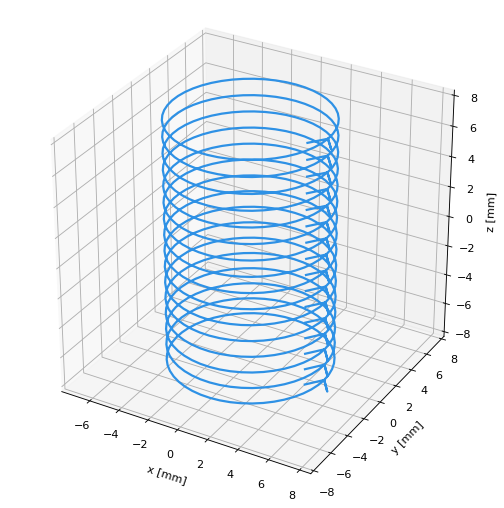

In [2]:
import numpy as np
import magpylib as magpy

coil1 = magpy.Collection()
for z in np.linspace(-8, 8, 16):
    winding = magpy.current.Loop(
        current=100,
        diameter=10,
        position=(0,0,z),
    )
    coil1.add(winding)

coil1.show()

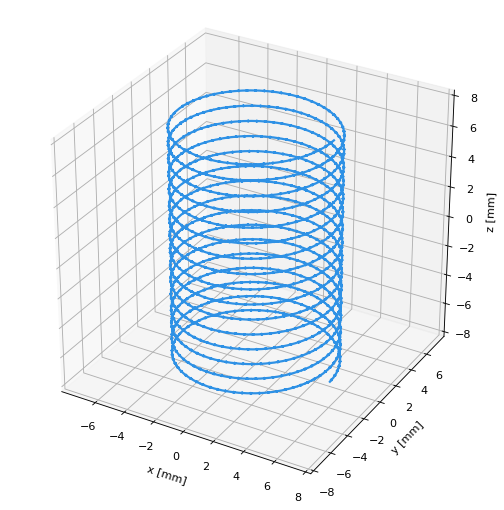

In [3]:
import numpy as np
import magpylib as magpy

ts = np.linspace(-8, 8, 1000)
vertices = np.c_[5*np.cos(ts*2*np.pi), 5*np.sin(ts*2*np.pi), ts]
coil2 = magpy.current.Line(
    current=100,
    vertices=vertices
)

coil2.show()

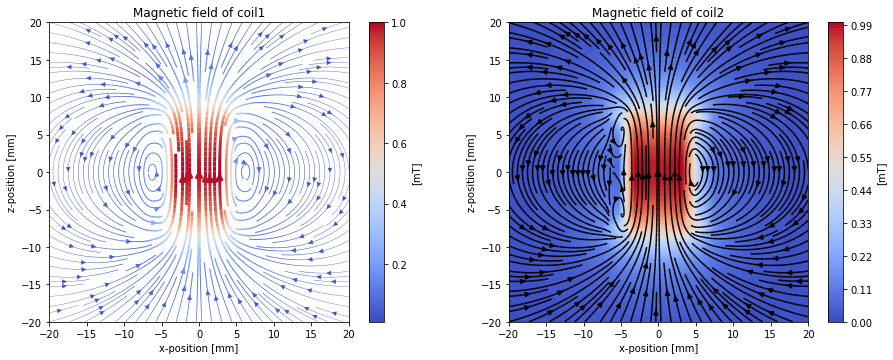

In [4]:
import matplotlib.pyplot as plt

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(13,5))

# create grid
ts = np.linspace(-20, 20, 20)
grid = np.array([[(x,0,z) for x in ts] for z in ts])

# compute and plot field of coil1
B = magpy.getB(coil1, grid)
Bamp = np.linalg.norm(B, axis=2)
Bamp /= np.amax(Bamp)

sp = ax1.streamplot(
    grid[:,:,0], grid[:,:,2], B[:,:,0], B[:,:,2],
    density=2,
    color=Bamp,
    linewidth=np.sqrt(Bamp)*3,
    cmap='coolwarm',
)

# compute and plot field of coil2
B = magpy.getB(coil2, grid)
Bamp = np.linalg.norm(B, axis=2)
Bamp /= np.amax(Bamp)

cp = ax2.contourf(
    grid[:,:,0], grid[:,:,2], Bamp,
    levels=100,
    cmap='coolwarm',
)
ax2.streamplot(
    grid[:,:,0], grid[:,:,2], B[:,:,0], B[:,:,2],
    density=2,
    color='black',
)

# figure styling
ax1.set(
    title='Magnetic field of coil1',
    xlabel='x-position [mm]',
    ylabel='z-position [mm]',
    aspect=1,
)
ax2.set(
    title='Magnetic field of coil2',
    xlabel='x-position [mm]',
    ylabel='z-position [mm]',
    aspect=1,
)

plt.colorbar(sp.lines, ax=ax1, label='[mT]')
plt.colorbar(cp, ax=ax2, label='[mT]')

plt.tight_layout()
plt.show()